# Lesson 16: Feature engineering demonstration

This notebook demonstrates key feature engineering techniques for transforming, scaling, and encoding features.

**1. Feature transformations**

- **Log transformation**: Apply logarithmic transformation to reduce skewness in right-skewed data
- **Square root transformation**: Apply square root transformation for moderate skewness reduction
- **Power transformation**: Use Box-Cox or Yeo-Johnson methods to make data more Gaussian-like
- **Quantile transformation**: Map values to uniform or normal distributions using quantiles

**2. Feature scaling**

- **Min-max scaling**: Scale features to a fixed range [0, 1]
- **Standard scaling**: Standardize features to have mean=0 and standard deviation=1

**3. Feature encoding**

- **Ordinal encoding**: Convert ordered categories to integers preserving rank order
- **One-hot encoding**: Create binary columns for each category (nominal data)
- **Feature hashing**: Map high-cardinality categorical features to fixed-size hash space

**4. Grouping operations**

- **Aggregate statistics**: Calculate group-level statistics (mean, median, std, etc.)
- **Group-based features**: Create features based on deviations and ratios from group means

## Notebook set up

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    PowerTransformer,
    QuantileTransformer,
    MinMaxScaler,
    StandardScaler,
    OrdinalEncoder,
    OneHotEncoder
)
from sklearn.feature_extraction import FeatureHasher

# Set random seed for reproducibility
np.random.seed(315)

### Load data

In [ ]:
df = pd.read_csv('https://gperdrizet.github.io/FSA_devops/assets/data/unit2/environmental_data.csv')

## 1. Feature transformations

### 1.1. Log transformation

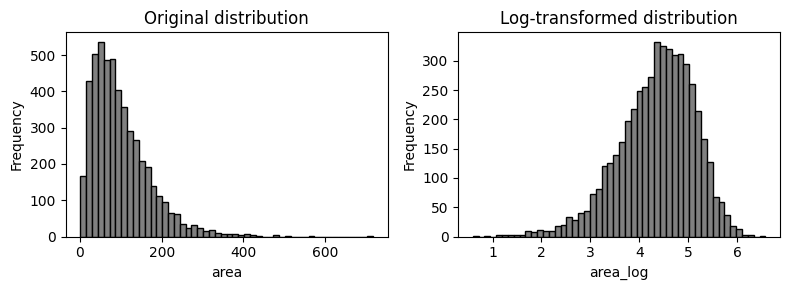

In [3]:
# Select a feature
feature = 'area'

# Apply log transformation (using log1p to handle zeros)
df[f'{feature}_log'] = np.log1p(df[feature])

# Visualize before and after
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].set_title('Original distribution')
axes[0].hist(df[feature], bins=50, edgecolor='black', color='grey')
axes[0].set_xlabel(feature)
axes[0].set_ylabel('Frequency')

axes[1].set_title('Log-transformed distribution')
axes[1].hist(df[f'{feature}_log'], bins=50, edgecolor='black', color='grey')
axes[1].set_xlabel(f'{feature}_log')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### 1.2. Square root transformation

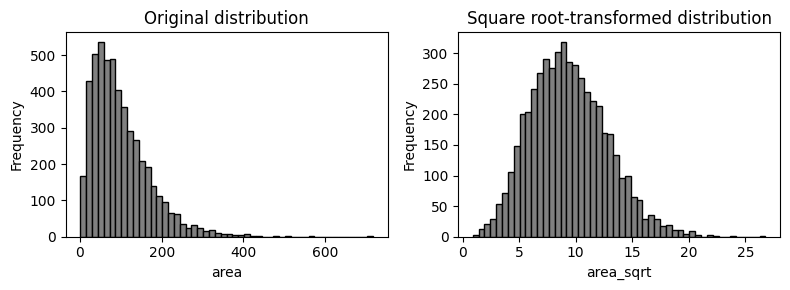

In [4]:
# Use a different feature for square root transformation
feature = 'area'

# Apply square root transformation
df[f'{feature}_sqrt'] = np.sqrt(df[feature])

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].set_title('Original distribution')
axes[0].hist(df[feature], bins=50, edgecolor='black', color='grey')
axes[0].set_xlabel(feature)
axes[0].set_ylabel('Frequency')

axes[1].set_title('Square root-transformed distribution')
axes[1].hist(df[f'{feature}_sqrt'], bins=50, edgecolor='black', color='grey')
axes[1].set_xlabel(f'{feature}_sqrt')
axes[1].set_ylabel('Frequency')



plt.tight_layout()
plt.show()

### 1.3. Power transformation

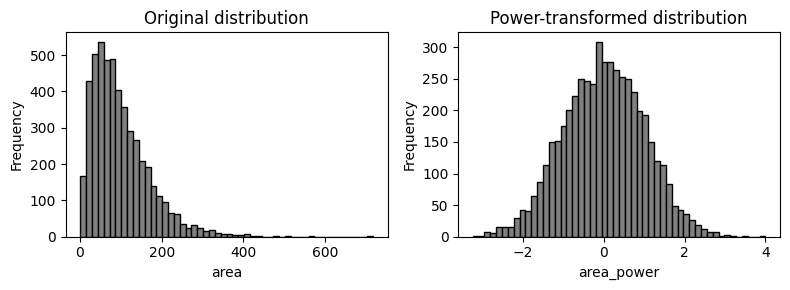

In [5]:
# Use a feature with outliers for power transformation
feature = 'area'

# Apply power transformation using Yeo-Johnson (handles positive and negative values)
transformer = PowerTransformer(method='yeo-johnson')

# Fit and transform
df[f'{feature}_power'] = transformer.fit_transform(df[[feature]])

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].set_title('Original distribution')
axes[0].hist(df[feature], bins=50, edgecolor='black', color='grey')
axes[0].set_xlabel(feature)
axes[0].set_ylabel('Frequency')

axes[1].set_title('Power-transformed distribution')
axes[1].hist(df[f'{feature}_power'], bins=50, edgecolor='black', color='grey')
axes[1].set_xlabel(f'{feature}_power')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### 1.4. Quantile transformation

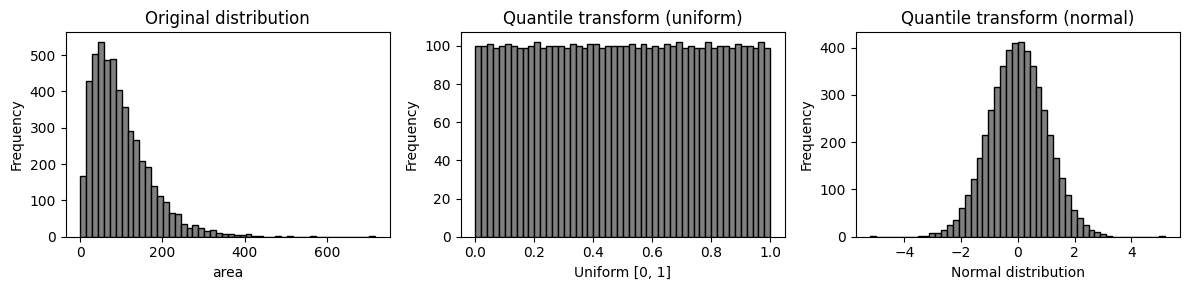

In [6]:
# Apply quantile transformation to uniform distribution
transformer = QuantileTransformer(output_distribution='uniform')

df[f'{feature}_quantile_uniform'] = transformer.fit_transform(df[[feature]])

# Apply quantile transformation to normal distribution
transformer = QuantileTransformer(output_distribution='normal')

df[f'{feature}_quantile_normal'] = transformer.fit_transform(df[[feature]])

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].set_title('Original distribution')
axes[0].hist(df[feature], bins=50, edgecolor='black', color='grey')
axes[0].set_xlabel(feature)
axes[0].set_ylabel('Frequency')

axes[1].set_title('Quantile transform (uniform)')
axes[1].hist(df[f'{feature}_quantile_uniform'], bins=50, edgecolor='black', color='grey')
axes[1].set_xlabel('Uniform [0, 1]')
axes[1].set_ylabel('Frequency')

axes[2].set_xlabel('Normal distribution')
axes[2].set_title('Quantile transform (normal)')
axes[2].hist(df[f'{feature}_quantile_normal'], bins=50, edgecolor='black', color='grey')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 2. Feature scaling

### 2.1. Min-max scaling

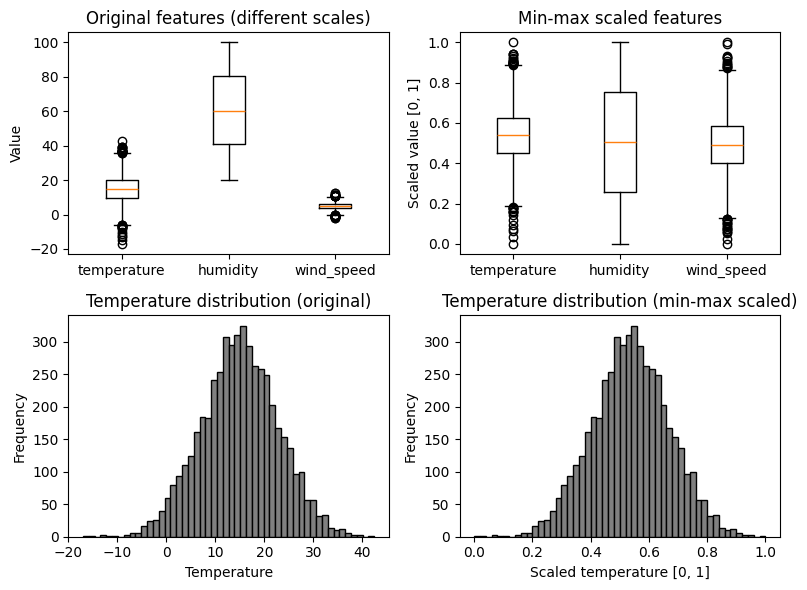

In [7]:
# Select features with different scales
features_to_scale = ['temperature', 'humidity', 'wind_speed']

# Apply Min-Max scaling
scaler = MinMaxScaler()

df_minmax = pd.DataFrame(
    scaler.fit_transform(df[features_to_scale]),
    columns=[f'{col}_minmax' for col in features_to_scale],
    index=df.index
)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

axes[0, 0].set_title('Original features (different scales)')
axes[0, 0].boxplot([df[col] for col in features_to_scale], tick_labels=features_to_scale)
axes[0, 0].set_ylabel('Value')

axes[0, 1].set_title('Min-max scaled features')
axes[0, 1].boxplot([df_minmax[col] for col in df_minmax.columns], tick_labels=features_to_scale)
axes[0, 1].set_ylabel('Scaled value [0, 1]')

axes[1, 0].set_title('Temperature distribution (original)')
axes[1, 0].hist(df['temperature'], bins=50, edgecolor='black', color='grey')
axes[1, 0].set_xlabel('Temperature')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].set_title('Temperature distribution (min-max scaled)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].hist(df_minmax['temperature_minmax'], bins=50, edgecolor='black', color='grey')
axes[1, 1].set_xlabel('Scaled temperature [0, 1]')

plt.tight_layout()
plt.show()

### 2.2. Standard scaling

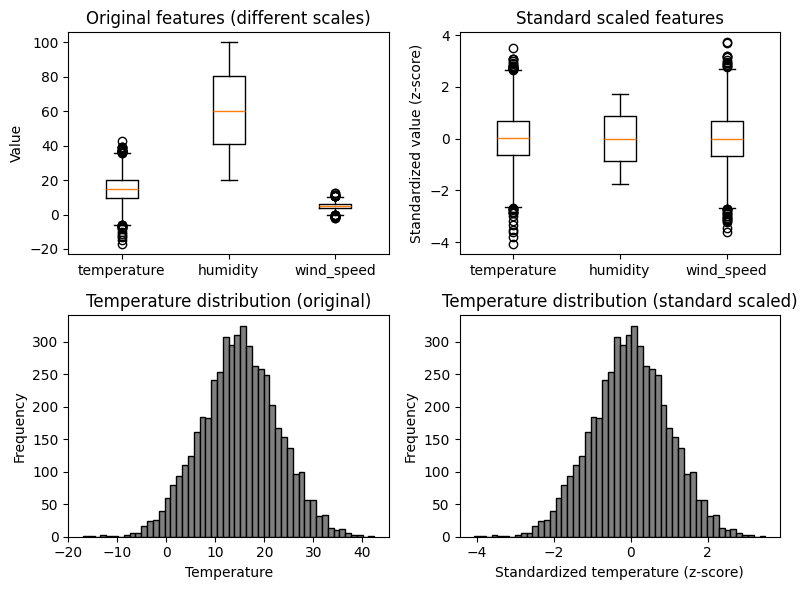

In [8]:
# Apply Standard scaling
scaler = StandardScaler()

df_standard = pd.DataFrame(
    scaler.fit_transform(df[features_to_scale]),
    columns=[f'{col}_standard' for col in features_to_scale],
    index=df.index
)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

axes[0, 0].set_title('Original features (different scales)')
axes[0, 0].boxplot([df[col] for col in features_to_scale], tick_labels=features_to_scale)
axes[0, 0].set_ylabel('Value')

axes[0, 1].set_title('Standard scaled features')
axes[0, 1].boxplot([df_standard[col] for col in df_standard.columns], tick_labels=features_to_scale)
axes[0, 1].set_ylabel('Standardized value (z-score)')

axes[1, 0].set_title('Temperature distribution (original)')
axes[1, 0].hist(df['temperature'], bins=50, edgecolor='black', color='grey')
axes[1, 0].set_xlabel('Temperature')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].set_title('Temperature distribution (standard scaled)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].hist(df_standard['temperature_standard'], bins=50, edgecolor='black', color='grey')
axes[1, 1].set_xlabel('Standardized temperature (z-score)')

plt.tight_layout()
plt.show()

## 3. Feature encoding

### 3.1. Ordinal encoding

In [9]:
# Use the ordinal categorical variable (quality)
# Define the order for ordinal encoding
categories = [['poor', 'fair', 'good', 'excellent']]

# Apply ordinal encoding
encoder = OrdinalEncoder(categories=categories)
df['quality_encoded'] = encoder.fit_transform(df[['quality']])

# Display mapping
print('Ordinal encoding mapping:')
df[['quality', 'quality_encoded']].drop_duplicates().sort_values('quality_encoded')

Ordinal encoding mapping:


,quality,quality_encoded
0,poor,0.0
5,fair,1.0
1,good,2.0
10,excellent,3.0


### 3.2. One-hot encoding

In [10]:
# Use the nominal categorical variable (region)
# Apply one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')
onehot_array = encoder.fit_transform(df[['region']])

# Create dataframe with proper column names
df_onehot = pd.DataFrame(
    onehot_array,
    columns=encoder.get_feature_names_out(['region']),
    index=df.index
)

df_onehot.head(10)

,region_desert,region_forest,region_mountain,region_plains
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0


### 3.3. Feature hashing

In [11]:
# Use the high-cardinality categorical variable (location_id)
print(f'Number of unique location IDs: {df["location_id"].nunique()}')
print(f'Sample IDs:')
print(df['location_id'].head(10))

# Apply feature hashing
hasher = FeatureHasher(n_features=10, input_type='string')

# Transform to sparse matrix
hashed_features = hasher.transform(df['location_id'].apply(lambda x: [x]))

# Convert to dense array for visualization
hashed_array = hashed_features.toarray()

print(f'\nFeature hashing result:')
print(f'Original feature: {df["location_id"].nunique()} unique categories')
print(f'Hashed features: {hashed_array.shape[1]} fixed dimensions')
print(f'Sparse matrix density: {hashed_features.nnz / (hashed_features.shape[0] * hashed_features.shape[1]):.2%}')

# Show sample of hashed features
hashed_df = pd.DataFrame(
    hashed_array[:5],
    columns=[f'hash_{i}' for i in range(hashed_array.shape[1])]
)
print(f'\nSample hashed features:')
hashed_df.head()

Number of unique location IDs: 3871
Sample IDs:
0    loc_3785
1    loc_3516
2    loc_1243
3    loc_5493
4    loc_4287
5    loc_7659
6    loc_4101
7    loc_1624
8    loc_2073
9    loc_1857
Name: location_id, dtype: object

Feature hashing result:
Original feature: 3871 unique categories
Hashed features: 10 fixed dimensions
Sparse matrix density: 10.00%

Sample hashed features:


,hash_0,hash_1,hash_2,hash_3,hash_4,hash_5,hash_6,hash_7,hash_8,hash_9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4. Grouping operations

In [12]:
# Group by region and calculate statistics
grouped_stats = df.groupby('region')['temperature'].agg([
    'mean',
    'median',
    'std',
    'min',
    'max',
    'count'
]).round(2)

print('Temperature statistics by region:')
print(grouped_stats)

Temperature statistics by region:
           mean  median   std    min    max  count
region                                            
coastal   14.48   14.33  7.87 -17.03  42.48   1028
desert    15.45   15.51  7.68 -11.31  36.91   1009
forest    15.16   15.22  7.85 -14.87  39.03   1012
mountain  15.02   15.09  7.96 -13.32  39.16    988
plains    14.68   14.70  7.91 -12.70  36.48    963


In [13]:
# Create aggregate features
# Add mean temperature by region
df['temp_mean_by_region'] = df.groupby('region')['temperature'].transform('mean')

# Create deviation from group mean
df['temp_deviation'] = df['temperature'] - df['temp_mean_by_region']

# Create ratio to group mean (add constant to avoid division issues)
df['temp_ratio'] = (df['temperature'] + 50) / (df['temp_mean_by_region'] + 50)

print('New aggregate features:')
print(df[['region', 'temperature', 'temp_mean_by_region', 'temp_deviation', 'temp_ratio']].head(10))

New aggregate features:
     region  temperature  temp_mean_by_region  temp_deviation  temp_ratio
0    plains    31.491777            14.682855       16.808921    1.259867
1    desert     5.269434            15.445163      -10.175729    0.844515
2  mountain    15.870105            15.022116        0.847988    1.013042
3   coastal     6.708924            14.483543       -7.774620    0.879432
4   coastal    20.178990            14.483543        5.695447    1.088324
5   coastal    16.707155            14.483543        2.223612    1.034483
6  mountain    14.618176            15.022116       -0.403941    0.993788
7   coastal    29.902072            14.483543       15.418529    1.239108
8    plains     4.415018            14.682855      -10.267838    0.841259
9   coastal    24.006938            14.483543        9.523394    1.147687
